<a href="https://colab.research.google.com/github/Pavinithan1998/DataScience_Practice/blob/main/DataScience_Practical_25_01_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cpu
cuda:0


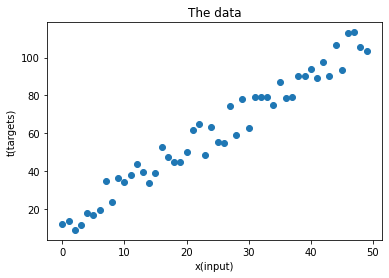

torch.Size([50, 1]) torch.Size([50, 2]) torch.Size([2, 1])
[2157.01708984375, 865.9274291992188, 372.03460693359375, 183.0888671875, 110.79254913330078, 83.11762237548828, 72.51140594482422, 68.4344253540039, 66.85508728027344, 66.23112487792969, 65.97268676757812, 65.85405731201172, 65.7889633178711, 65.74434661865234, 65.70758819580078, 65.67384338378906, 65.64129638671875, 65.60919952392578, 65.57732391357422, 65.54552459716797, 65.51380920410156, 65.48210906982422, 65.45045471191406, 65.4188461303711, 65.38724517822266, 65.3556900024414, 65.32417297363281, 65.29267120361328, 65.26122283935547, 65.22978973388672, 65.19839477539062, 65.16704559326172, 65.13572692871094, 65.10443115234375, 65.07316589355469, 65.04192352294922, 65.01072692871094, 64.97956848144531, 64.94842529296875, 64.9173355102539, 64.88626098632812, 64.85521697998047, 64.82421875, 64.79322814941406, 64.76229095458984, 64.73136901855469, 64.70049285888672, 64.6696548461914, 64.63883209228516, 64.60804748535156]


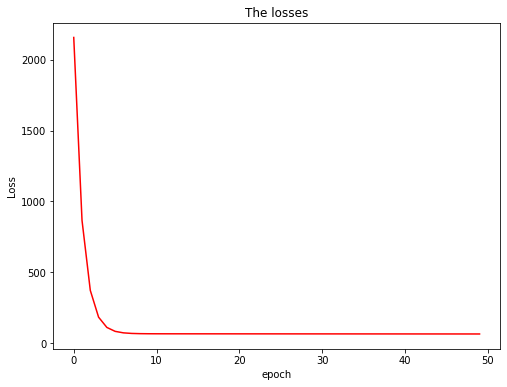

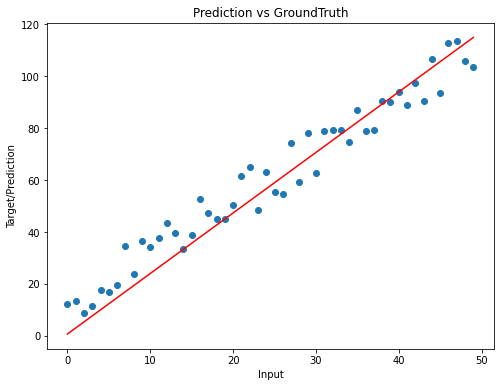

In [31]:
import torch 
import matplotlib.pyplot as plt
import numpy as np


#  y=X.w         y(n*1)= X(n*d).w(d*1)  
n=50
d=1
X_ori = torch.arange(0,n).view(-1,1)
t = 2*X_ori + 1 + 20*torch.rand(n).view(-1,1)


print(t.device)  #find which device it use 
if torch.cuda.is_available:
  X_ori= X_ori.to("cuda:0")
  t= t.to("cuda:0")

print(t.device)

if torch.cuda.is_available:
  plt.scatter(X_ori.cpu().numpy(), t.cpu().numpy())
else:
  plt.scatter(X_ori.numpy(), t.numpy())
# plt.scatter(X.numpy(),t.numpy())
plt.title("The data")
plt.xlabel('x(input)')
plt.ylabel('t(targets)')
plt.show()

#Learning
w = torch.rand(d+1,1).cuda()
X= torch.cat((X_ori, torch.ones(n,1).cuda()), dim=1)

print(t.shape, X.shape, w.shape)

w.requires_grad=True

nepochs = 50
lr = 0.001
lossArr=[]

for epoch in range(nepochs):
  #calculate predicions
  y = torch.matmul(X,w)

  # calculate the loss
  L = torch.pow(y-t,2).mean()
  lossArr.append(L.item())
  
  # calculate the Derivatives
  L.backward()

  #update w
  w.data = w.data - lr * w.grad

  #set gradient to zero inorder to prevent accumulation
  w.grad = None

print(lossArr)

fir = plt.figure(figsize=(8,6))
plt.plot(list(range(nepochs)),lossArr,'r-')
plt.title("The losses")
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()


#calculate the predictions
y = torch.matmul(X,w)

fir = plt.figure(figsize=(8,6))
plt.title("The Prediction")
plt.scatter(X_ori.cpu().numpy(),t.cpu().numpy())
plt.plot(X_ori.cpu().numpy(), y.data.cpu().numpy(), 'r-')
plt.title("Prediction vs GroundTruth")
plt.xlabel('Input')
plt.ylabel('Target/Prediction')
plt.show()

cpu
cuda:0


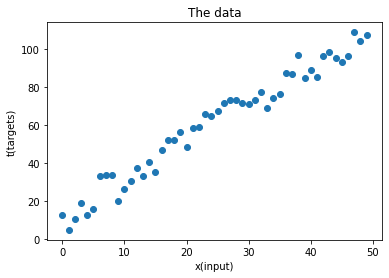

torch.Size([50, 1]) torch.Size([50, 2]) torch.Size([2, 1])
[2904.223388671875, 1150.2606201171875, 479.3063049316406, 222.62905883789062, 124.42290496826172, 86.83570098876953, 72.43679809570312, 66.90797424316406, 64.7721939086914, 63.93441390991211, 63.59310531616211, 63.44174575805664, 63.363059997558594, 63.31219482421875, 63.27204132080078, 63.23594665527344, 63.20144271850586, 63.16758728027344, 63.13397216796875, 63.100502014160156, 63.06708908081055, 63.033714294433594, 63.000389099121094, 62.96712875366211, 62.933860778808594, 62.9006233215332, 62.867454528808594, 62.83430480957031, 62.80118942260742, 62.76809310913086, 62.73505401611328, 62.7020149230957, 62.66904067993164, 62.63609313964844, 62.60319519042969, 62.57030487060547, 62.53746032714844, 62.504661560058594, 62.47187805175781, 62.43913269042969, 62.40640640258789, 62.37373352050781, 62.341102600097656, 62.308475494384766, 62.27591323852539, 62.24335861206055, 62.21084976196289, 62.17837142944336, 62.14591598510742, 

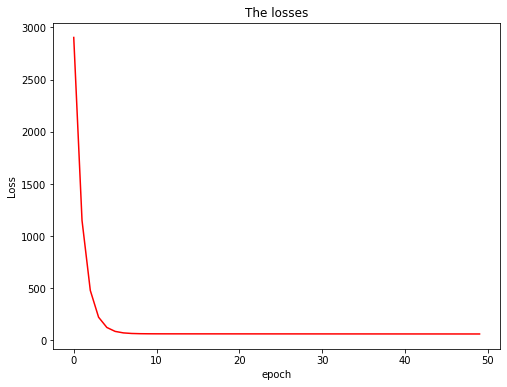

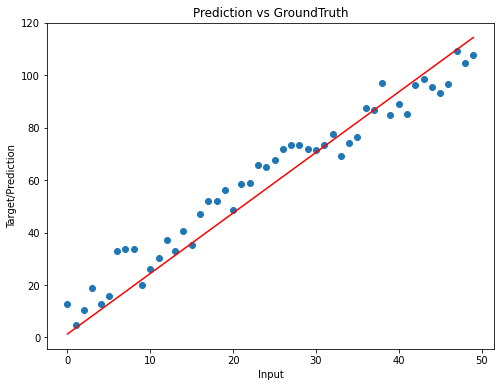

In [32]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
import torch.nn


#  y=X.w         y(n*1)= X(n*d).w(d*1)  
n=50
d=1
X_ori = torch.arange(0,n).view(-1,1)
t = 2*X_ori + 1 + 20*torch.rand(n).view(-1,1)


print(t.device)  #find which device it use 
if torch.cuda.is_available:
  X_ori= X_ori.to("cuda:0")
  t= t.to("cuda:0")

print(t.device)

if torch.cuda.is_available:
  plt.scatter(X_ori.cpu().numpy(), t.cpu().numpy())
else:
  plt.scatter(X_ori.numpy(), t.numpy())
# plt.scatter(X.numpy(),t.numpy())
plt.title("The data")
plt.xlabel('x(input)')
plt.ylabel('t(targets)')
plt.show()

#Learning
w = torch.rand(d+1,1).cuda()
X= torch.cat((X_ori, torch.ones(n,1).cuda()), dim=1)

print(t.shape, X.shape, w.shape)

w.requires_grad=True

criterian = torch.nn.MSELoss()


nepochs = 50
lr = 0.001
lossArr=[]

for epoch in range(nepochs):
  #calculate predicions
  y = torch.matmul(X,w)

  # calculate the loss
  L = criterian(y,t)
  lossArr.append(L.item())
  
  # calculate the Derivatives
  L.backward()

  #update w
  w.data = w.data - lr * w.grad

  #set gradient to zero inorder to prevent accumulation
  w.grad = None

print(lossArr)

fir = plt.figure(figsize=(8,6))
plt.plot(list(range(nepochs)),lossArr,'r-')
plt.title("The losses")
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()


#calculate the predictions
y = torch.matmul(X,w)

fir = plt.figure(figsize=(8,6))
plt.title("The Prediction")
plt.scatter(X_ori.cpu().numpy(),t.cpu().numpy())
plt.plot(X_ori.cpu().numpy(), y.data.cpu().numpy(), 'r-')
plt.title("Prediction vs GroundTruth")
plt.xlabel('Input')
plt.ylabel('Target/Prediction')
plt.show()